<hr style="height: 4px; color: #839D2D; width: 100%; ">

# <font color='#61210B'>Formation OpenClassRooms   -   Parcours DATA ANALYST</font>

<hr style="height: 2px; color: #839D2D; width: 100%; ">

## <font color='#38610B'>Projet IV - Analysez les ventes de votre entreprise</font>

### Mission 1 - Nettoyage des données
Données extraites directement de la base de l’entreprise vers les fichiers CSV (<a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/dataset_P4.zip">Lien</a>)  
Voici les DataFrames pandas contenant ces tables/fichiers :  
* <font color='#8A0808'>DataFrame <strong>cst</strong></font> : Table "customers.csv" (liste des clients)
* <font color='#8A0808'>DataFrame <strong>prd</strong></font> : Table "products.csv" (liste des produits)
* <font color='#8A0808'>DataFrame <strong>tra</strong></font> : Table "transactions.csv" (historique des ventes)  
 
  
* <font color='#013ADF'>DataFrame <strong>sal</strong></font> : Fichier enrichi pour analyses des ventes

**<font color='#38610B'>- Date : 31 Jan 2019</font>**  
Auteur : Frédéric Boissy
<hr style="height: 4px; color: #839D2D; width: 100%; ">


#####   <font color='#013ADF'>ENVIRONNEMENT DE TRAVAIL :</font> Définition - Initialisation

In [1]:
# -*- coding: utf8 -*-
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format   # Nombres avec sepa milliers "," et 2décimales après "."
pd.options.mode.use_inf_as_na = True

import seaborn as sns
import matplotlib as matplt
import matplotlib.pyplot as plt
import scipy as sc
import scipy.stats as scst
import statsmodels as st

from IPython.display import display, Markdown, HTML  # pour gérer un affichage plus joli que la fonction "print"

import time   # Librairie temps pour calculs durée par exemple
trt_start_time = time.time()

#####   <font color='#013ADF'>REPERTOIRE DE TRAVAIL :</font> (du Projet)
Par defaut on utilisera celui dans lequel se trouve ce fichier jupyter - Puis on spécifie le dossier DATA

In [2]:
%cd DATA

D:\DATA_ANALYST\WORK\#GITHUB\PJ4\DATA


#####   <font color='#013ADF'>CHARGEMENT DES TABLES "csv" :</font> dans les Dataframes "Pandas"

In [3]:
cst = pd.read_csv("customers.csv")
prd = pd.read_csv("products.csv")
tra = pd.read_csv("transactions.zip", sep=";")

<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>Table Client</u></font> : Dataframe 'cst'
- Choix Clé Primaire : <strong>'client_id'</strong>

In [4]:
cst.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


* **Recherche de Valeurs Nulles** et suppression sur la clé primaire et init des autres colonnes

In [5]:
cst.dropna(subset=['client_id'], inplace=True)
cst.sex = cst.sex.fillna('')
cst.birth = cst.birth.fillna(0)

In [6]:
cst.isnull().values.any()

False

* **Recherche de Doublons**

In [7]:
cst[cst.duplicated(subset=['client_id']) == True].head()
#cst.drop_duplicates(subset='client_id', inplace=True)

,client_id,sex,birth


* **Recherche de valeurs aberrantes residuelles**

In [8]:
# Valeurs distinctes de la colonne "sex"
cst.sex.unique()

array(['f', 'm'], dtype=object)

In [9]:
cst['age'] = (2022 - cst['birth']).astype('int')

In [10]:
cst.info()
cst.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8623 entries, 0 to 8622
Data columns (total 4 columns):
client_id    8623 non-null object
sex          8623 non-null object
birth        8623 non-null int64
age          8623 non-null int32
dtypes: int32(1), int64(1), object(2)
memory usage: 303.2+ KB


,client_id,sex,birth,age
count,8623,8623,"8,623.00","8,623.00"
unique,8623,2,nan,nan
top,c_2682,f,nan,nan
freq,1,4491,nan,nan
mean,NaN,NaN,"1,978.28",43.72
std,NaN,NaN,16.92,16.92
min,NaN,NaN,"1,929.00",18.00
25%,NaN,NaN,"1,966.00",30.00
50%,NaN,NaN,"1,979.00",43.00
75%,NaN,NaN,"1,992.00",56.00


<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>Table Produits</u></font> : Dataframe 'prd'
- Choix Clé Primaire : <strong>'categ' / 'id_prod'</strong>

In [11]:
prd.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


* **Recherche de Valeurs Nulles** et suppression sur la clé primaire et init des autres colonnes

In [12]:
prd.dropna(subset=['categ', 'id_prod'], inplace=True)
prd.price = prd.price.fillna(0)
prd.categ = prd.categ.fillna(0)

In [13]:
prd.isnull().values.any()

False

* **Recherche de Doublons**

In [14]:
prd[prd.duplicated(subset=['categ', 'id_prod']) == True].head()
# prd.drop_duplicates(subset=['categ', 'id_prod'], inplace=True)

,id_prod,price,categ


* **Recherche de valeurs aberrantes residuelles**

In [15]:
# Valeurs distinctes de la colonne "categorie" et leurs quantité respectives
prd.groupby('categ')['id_prod'].count().reset_index()

,categ,id_prod
0,0,2309
1,1,739
2,2,239


In [16]:
# Recherche de produits ayant un prix négatif
prd[prd.price < 0].head()

,id_prod,price,categ
731,T_0,-1.00,0


In [17]:
# Suppression des lignes dont le Produit a un prix négatif
prd.drop(prd[prd.price < 0].index, inplace=True)

In [18]:
prd.info()
prd.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
id_prod    3286 non-null object
price      3286 non-null float64
categ      3286 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.7+ KB


,id_prod,price,categ
count,3286,"3,286.00","3,286.00"
unique,3286,nan,nan
top,0_1997,nan,nan
freq,1,nan,nan
mean,NaN,21.86,0.37
std,NaN,29.85,0.62
min,NaN,0.62,0.00
25%,NaN,6.99,0.00
50%,NaN,13.07,0.00
75%,NaN,22.99,1.00


<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>Table Transactions</u></font> : Dataframe 'tra'
- Choix Clé Primaire : <strong>'session_id' / 'date'</strong>

In [19]:
tra.head()

,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242


* **Recherche de Valeurs Nulles** et suppression sur la clé primaire et init des autres colonnes

In [20]:
tra.dropna(subset=['session_id', 'date'], inplace=True)
tra.id_prod = tra.id_prod.fillna('')
tra.client_id = tra.client_id.fillna(0)
tra.isnull().values.any()

False

* **Recherche de Doublons**

In [21]:
tra[tra.duplicated(subset=['session_id', 'date']) == True].head()

,id_prod,date,session_id,client_id
27161,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_0
34387,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_0
48425,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
54813,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
56373,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_0


In [22]:
tra[tra.date.str.contains("test_")].head()

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1


In [23]:
# Suppression des valeurs date contentant "test_"
tra.drop(tra[tra.date.str.contains("test_") == True].index, inplace=True)

####  <font color='purple'>Traitement de la Reference (0_2245) inexistante dans la table Products</font>  

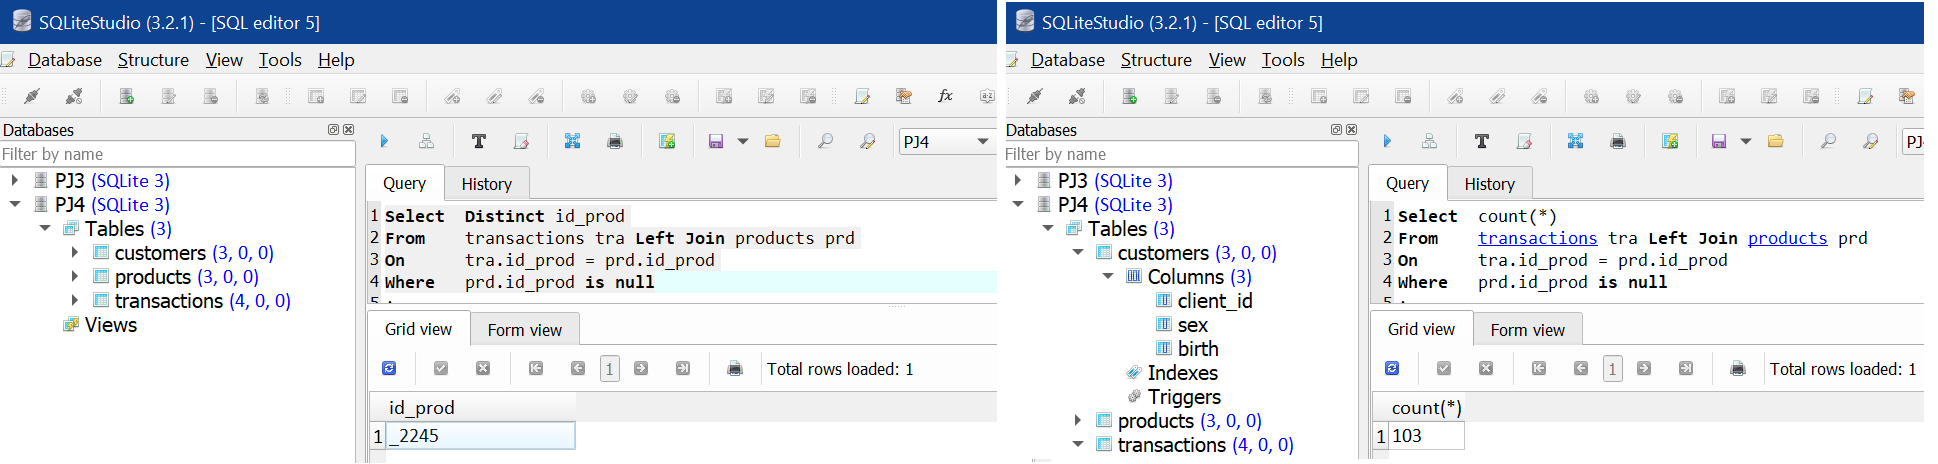


####  <font color='purple'>Imputation d'une valeur "moyenne" pour la Ref "0_2245" </font>  
<font color='purple'>On crée une ligne dans la table "products" afin que les ventes correspondantes ne soient pas rejetées à l'opération "merge" suivante.</font>  
Imputation de la valeur <b>"médiane"</b> du prix de la catégorie  (peut différent de la moyenne : 10.32 vs 11.73)

In [24]:
prd[prd['categ']==0]['price'].describe()

count   2,308.00
mean       11.73
std         7.57
min         0.62
25%         5.59
50%        10.32
75%        16.66
max        40.99
Name: price, dtype: float64

In [25]:
prd = prd.append({'id_prod':'0_2245', 'price':10.32, 'categ':0}, ignore_index=True)
prd.tail()

,id_prod,price,categ
3282,0_146,17.14,0
3283,0_802,11.22,0
3284,1_140,38.56,1
3285,0_1920,25.16,0
3286,0_2245,10.32,0


<strong>Recherche de valeurs aberrantes residuelles</strong>
- On ne conserve que les lignes dont les clients existent dans le dataframe "client" : <strong>cst</strong>  
- On ne conserve que les lignes dont les produits existent dans le dataframe "produits" : <strong>prd</strong>  
- On supprimer toutes lignes ayant des valeurs "NaN"

In [26]:
tra = pd.merge(tra, cst, how='outer')
tra = pd.merge(tra, prd, how='outer')
tra = tra.dropna()

In [27]:
tra.isnull().values.any()

False

In [28]:
tra.info()
tra.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336815
Data columns (total 9 columns):
id_prod       336816 non-null object
date          336816 non-null object
session_id    336816 non-null object
client_id     336816 non-null object
sex           336816 non-null object
birth         336816 non-null float64
age           336816 non-null float64
price         336816 non-null float64
categ         336816 non-null float64
dtypes: float64(4), object(5)
memory usage: 25.7+ MB


,id_prod,date,session_id,client_id,sex,birth,age,price,categ
count,336816,336816,336816,336816,336816,"336,816.00","336,816.00","336,816.00","336,816.00"
unique,3265,336816,169194,8600,2,nan,nan,nan,nan
top,1_369,2021-05-03 12:08:11.986192,s_118668,c_1609,m,nan,nan,nan,nan
freq,1081,1,14,12855,169241,nan,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,"1,977.82",44.18,17.21,0.43
std,NaN,NaN,NaN,NaN,NaN,13.52,13.52,17.85,0.59
min,NaN,NaN,NaN,NaN,NaN,"1,929.00",18.00,0.62,0.00
25%,NaN,NaN,NaN,NaN,NaN,"1,971.00",35.00,8.61,0.00
50%,NaN,NaN,NaN,NaN,NaN,"1,980.00",42.00,13.90,0.00
75%,NaN,NaN,NaN,NaN,NaN,"1,987.00",51.00,18.99,1.00


<hr style="height: 3px; color: #839D2D; width: 100%; ">

###  <font color='#61210B'><u>Creation Dataframe "enrichi" des Ventes</u></font> : Dataframe 'sal'
Ce dataframe contient :  
* les données de la table/dataframe transactions
* les données de la table/dataframe clients (+ nelle colonne "age")
* les données de la table/dataframe produits

In [29]:
salm2 = tra.copy()
salm2.columns = ['prod', 'session_date', 'session_id', 'client', 'sex', 'birthyear', 'age', 'price', 'categ']
salm2['age'] = (2022 - salm2['birthyear']).astype('int')
salm2['birthyear'] = salm2['birthyear'].astype('int')
salm2['categ'] = salm2['categ'].astype('int')
salm2['period'] = salm2['session_date'].str[0:7:1]
salm2['year'] = salm2['session_date'].str[0:4:1].astype('int')
salm2['month'] = salm2['session_date'].str[5:7:1].astype('int')
salm2['day'] = salm2['session_date'].str[8:10:1].astype('int')
salm2['time'] = salm2['session_date'].str[11:16:1]

cols = ['session_id', 'client', 'sex', 'age', 'birthyear', 'prod', 'price', 'categ', 'period', 
        'year', 'month', 'day', 'time', 'session_date']
salm2 = salm2[cols]

In [30]:
salm2.head()

,session_id,client,sex,age,birthyear,prod,price,categ,period,year,month,day,time,session_date
0,s_18746,c_4450,f,45,1977,0_1483,4.99,0,2021-04,2021,4,10,18:37,2021-04-10 18:37:28.723910
1,s_140787,c_5433,f,41,1981,0_1483,4.99,0,2021-12,2021,12,27,11:11,2021-12-27 11:11:12.123067
2,s_110736,c_857,m,37,1985,0_1483,4.99,0,2021-10,2021,10,27,04:56,2021-10-27 04:56:38.293970
3,s_57626,c_3679,f,33,1989,0_1483,4.99,0,2021-07,2021,7,4,06:43,2021-07-04 06:43:45.676567
4,s_92165,c_1609,m,42,1980,0_1483,4.99,0,2021-09,2021,9,19,08:45,2021-09-19 08:45:43.735331


<strong>Repérage Données manquantes entre le 1er et le 28 octobre pour la (catégorie 1) </strong>


In [31]:
df = salm2.groupby(['period', 'categ'])['prod'].count().reset_index(name="counts")
df = df[df['categ']==1].sort_values(['categ', 'period'])
df

,period,categ,counts
1,2021-03,1,9134
4,2021-04,1,7579
7,2021-05,1,8107
10,2021-06,1,9264
13,2021-07,1,9169
16,2021-08,1,7954
19,2021-09,1,9268
22,2021-10,1,1666
25,2021-11,1,12316
28,2021-12,1,12259


In [32]:
df = salm2.groupby(['year', 'month', 'day', 'categ'])['prod'].count().reset_index(name="counts")
df = df[(df['categ']==1)&(df['month']==10)].sort_values(['categ', 'year', 'month', 'day'])
df.head()

,year,month,day,categ,counts
643,2021,10,1,1,344
698,2021,10,28,1,316
701,2021,10,29,1,326
704,2021,10,30,1,338
707,2021,10,31,1,342


In [33]:
salm2.info()
salm2.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336816 entries, 0 to 336815
Data columns (total 14 columns):
session_id      336816 non-null object
client          336816 non-null object
sex             336816 non-null object
age             336816 non-null int32
birthyear       336816 non-null int32
prod            336816 non-null object
price           336816 non-null float64
categ           336816 non-null int32
period          336816 non-null object
year            336816 non-null int32
month           336816 non-null int32
day             336816 non-null int32
time            336816 non-null object
session_date    336816 non-null object
dtypes: float64(1), int32(6), object(7)
memory usage: 30.8+ MB


,session_id,client,sex,age,birthyear,prod,price,categ,period,year,month,day,time,session_date
count,336816,336816,336816,"336,816.00","336,816.00",336816,"336,816.00","336,816.00",336816,"336,816.00","336,816.00","336,816.00",336816,336816
unique,169194,8600,2,nan,nan,3265,nan,nan,12,nan,nan,nan,1440,336816
top,s_118668,c_1609,m,nan,nan,1_369,nan,nan,2021-09,nan,nan,nan,21:38,2021-05-03 12:08:11.986192
freq,14,12855,169241,nan,nan,1081,nan,nan,33266,nan,nan,nan,282,1
mean,NaN,NaN,NaN,44.18,"1,977.82",NaN,17.21,0.43,NaN,"2,021.17",6.48,15.80,NaN,NaN
std,NaN,NaN,NaN,13.52,13.52,NaN,17.85,0.59,NaN,0.38,3.52,8.82,NaN,NaN
min,NaN,NaN,NaN,18.00,"1,929.00",NaN,0.62,0.00,NaN,"2,021.00",1.00,1.00,NaN,NaN
25%,NaN,NaN,NaN,35.00,"1,971.00",NaN,8.61,0.00,NaN,"2,021.00",3.00,8.00,NaN,NaN
50%,NaN,NaN,NaN,42.00,"1,980.00",NaN,13.90,0.00,NaN,"2,021.00",6.00,16.00,NaN,NaN
75%,NaN,NaN,NaN,51.00,"1,987.00",NaN,18.99,1.00,NaN,"2,021.00",9.00,23.00,NaN,NaN


<hr style="height: 3px; color: #839D2D; width: 100%; ">

##  <font color='purple'>/// OUTLIERS "Gros Clients", "Age=18ans" & Reference sans prix  ///</font>  
> <font color='purple'>ACTIONS A MENER AFIN DE NE PAS FAUSSER LES RESULTATS</font>

#### Lors de la mission 2 et etudes des graphes plusieurs particularités ont été detectées sur ce jeu de données :  
- Nb elevé de clients pour <B>age = 18ans</B>.  Il s'agit certainement d'une tranche d'age [0-18ans].  
    > Etude Mission 2 <span style="font-family:Wingdings">&#216;</span> 
    <b><span style="font-family:Wingdings">&#254;</span> Conservation</b> / 
    <span style="font-family:Wingdings">&#111;</span>Suppression  
    > Etude Mission 3 <span style="font-family:Wingdings">&#216;</span> 
    <span style="font-family:Wingdings">&#111;</span> Conservation / 
    <b><span style="font-family:Wingdings">&#254;</span>Suppression </b> 


- <b>4 "Gros cLients"</b> sont à noter. Ce ne sont pas certainement des particuliers : <b>Achats > 50'000 € / An  !!!</b>  
    > Etude Mission 2 <span style="font-family:Wingdings">&#216;</span> 
    <b><span style="font-family:Wingdings">&#254;</span> Conservation</b> / 
    <span style="font-family:Wingdings">&#111;</span>Suppression  
    > Etude Mission 3 <span style="font-family:Wingdings">&#216;</span> 
    <span style="font-family:Wingdings">&#111;</span> Conservation / 
    <b><span style="font-family:Wingdings">&#254;</span>Suppression </b> 


- Une reference présente <b>(_2245)</b> dans les "ventes", mais sa fiche produit <b>n'existe pas(plus)</b> dans la table products.  
    > Etude Mission 2 <span style="font-family:Wingdings">&#216;</span> 
    <b><span style="font-family:Wingdings">&#254;</span> Conservation </b> (comparaison <b>avec/sans</b> imputation valeur moyenne catégorie) / <span style="font-family:Wingdings">&#111;</span>Suppression   
    > Etude Mission 3 <span style="font-family:Wingdings">&#216;</span> 
    <b><span style="font-family:Wingdings">&#254;</span> Conservation </b> (<b>avec</b> imputation valeur moyenne catégorie) / <span style="font-family:Wingdings">&#111;</span>Suppression

####  <font color='purple'>Suppression des lignes de Ventes des clients "Age=18ans"  (Mission3) </font>  

In [34]:
# Suppression des lignes des clients agés de 18ans
salm3 = salm2.copy()
salm3.drop(salm3[salm3.age == 18].index, inplace=True)
salm3.head()

,session_id,client,sex,age,birthyear,prod,price,categ,period,year,month,day,time,session_date
0,s_18746,c_4450,f,45,1977,0_1483,4.99,0,2021-04,2021,4,10,18:37,2021-04-10 18:37:28.723910
1,s_140787,c_5433,f,41,1981,0_1483,4.99,0,2021-12,2021,12,27,11:11,2021-12-27 11:11:12.123067
2,s_110736,c_857,m,37,1985,0_1483,4.99,0,2021-10,2021,10,27,04:56,2021-10-27 04:56:38.293970
3,s_57626,c_3679,f,33,1989,0_1483,4.99,0,2021-07,2021,7,4,06:43,2021-07-04 06:43:45.676567
4,s_92165,c_1609,m,42,1980,0_1483,4.99,0,2021-09,2021,9,19,08:45,2021-09-19 08:45:43.735331


####  <font color='purple'>Suppression des lignes de Ventes des 4 Gros clients </font>  

In [35]:
# Stocker les 4 plus clients en terme de CA dans une variable tableau
salm3cli = salm3.groupby(['client'])['price'].sum().reset_index()
salm3cli = salm3cli.sort_values(['price'], ascending=False).head(4)
clidel = salm3cli['client'].values
salm3[salm3['client'].isin(clidel)].head()

,session_id,client,sex,age,birthyear,prod,price,categ,period,year,month,day,time,session_date
4,s_92165,c_1609,m,42,1980,0_1483,4.99,0,2021-09,2021,9,19,08:45,2021-09-19 08:45:43.735331
5,s_65805,c_1609,m,42,1980,0_1483,4.99,0,2021-07,2021,7,22,20:45,2021-07-22 20:45:15.286364
6,s_31519,c_1609,m,42,1980,0_1483,4.99,0,2021-05,2021,5,8,06:20,2021-05-08 06:20:05.395325
7,s_21725,c_1609,m,42,1980,0_1483,4.99,0,2021-04,2021,4,17,06:01,2021-04-17 06:01:35.017859
8,s_44891,c_1609,m,42,1980,0_1483,4.99,0,2021-06,2021,6,6,13:42,2021-06-06 13:42:00.282408


In [36]:
# Suppression des lignes des clients agés de 18ans
salm3.drop(salm3[salm3.client.isin(clidel)].index, inplace=True)

In [37]:
salm3.info()
salm3.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306303 entries, 0 to 336815
Data columns (total 14 columns):
session_id      306303 non-null object
client          306303 non-null object
sex             306303 non-null object
age             306303 non-null int32
birthyear       306303 non-null int32
prod            306303 non-null object
price           306303 non-null float64
categ           306303 non-null int32
period          306303 non-null object
year            306303 non-null int32
month           306303 non-null int32
day             306303 non-null int32
time            306303 non-null object
session_date    306303 non-null object
dtypes: float64(1), int32(6), object(7)
memory usage: 28.0+ MB


,session_id,client,sex,age,birthyear,prod,price,categ,period,year,month,day,time,session_date
count,306303,306303,306303,"306,303.00","306,303.00",306303,"306,303.00","306,303.00",306303,"306,303.00","306,303.00","306,303.00",306303,306303
unique,153626,8159,2,nan,nan,3261,nan,nan,12,nan,nan,nan,1440,306303
top,s_118668,c_2140,f,nan,nan,1_369,nan,nan,2021-09,nan,nan,nan,09:19,2021-05-03 12:08:11.986192
freq,14,195,159268,nan,nan,990,nan,nan,30410,nan,nan,nan,258,1
mean,NaN,NaN,NaN,44.84,"1,977.16",NaN,16.55,0.41,NaN,"2,021.17",6.48,15.80,NaN,NaN
std,NaN,NaN,NaN,13.34,13.34,NaN,16.38,0.57,NaN,0.38,3.52,8.82,NaN,NaN
min,NaN,NaN,NaN,19.00,"1,929.00",NaN,0.62,0.00,NaN,"2,021.00",1.00,1.00,NaN,NaN
25%,NaN,NaN,NaN,35.00,"1,971.00",NaN,8.57,0.00,NaN,"2,021.00",3.00,8.00,NaN,NaN
50%,NaN,NaN,NaN,43.00,"1,979.00",NaN,13.65,0.00,NaN,"2,021.00",6.00,16.00,NaN,NaN
75%,NaN,NaN,NaN,51.00,"1,987.00",NaN,18.99,1.00,NaN,"2,021.00",9.00,23.00,NaN,NaN


####  <font color='purple'>Suppression des lignes de la ref '0_2245' pour comparaison dans mission 2</font>  

In [38]:
salm2s = salm2.copy()
salm2s.drop(salm2s[salm2s['prod'] == '0_2245'].index, inplace=True)
salm2s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336713 entries, 0 to 336815
Data columns (total 14 columns):
session_id      336713 non-null object
client          336713 non-null object
sex             336713 non-null object
age             336713 non-null int32
birthyear       336713 non-null int32
prod            336713 non-null object
price           336713 non-null float64
categ           336713 non-null int32
period          336713 non-null object
year            336713 non-null int32
month           336713 non-null int32
day             336713 non-null int32
time            336713 non-null object
session_date    336713 non-null object
dtypes: float64(1), int32(6), object(7)
memory usage: 30.8+ MB


<hr style="height: 3px; color: #839D2D; width: 100%; ">

###   <font color='#013ADF'>EXPORT des Dataframes consolidés :</font> dans des fichiers "csv"

In [39]:
%cd ..
%cd OUTFILES

D:\DATA_ANALYST\WORK\#GITHUB\PJ4
D:\DATA_ANALYST\WORK\#GITHUB\PJ4\OUTFILES


In [40]:
salm2.to_csv('m2_sales_avec_outliers_avec_imput_ref.zip', sep=',', encoding='utf-8', index=False, compression='zip')
salm2s.to_csv('m2_sales_avec_outliers_sans_imput_ref.zip', sep=',', encoding='utf-8', index=False, compression='zip')
salm3.to_csv('m3_sales_sans_outliers_avec_imput_ref.zip', sep=',', encoding='utf-8', index=False, compression='zip')
cst.to_csv('cst.csv', sep=',', encoding='utf-8', index=False)
prd.to_csv('prd.csv', sep=',', encoding='utf-8', index=False)

In [41]:
dureetotale = round(time.time() - trt_start_time, 5)
print("--- Durée TOTALE du Notebook PJ4 Mission 1 --- ", "%s seconds" % dureetotale)

--- Durée TOTALE du Notebook PJ4 Mission 1 ---  18.82623 seconds
